In [1]:
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import  EarlyStopping
import random

# 기존 train 데이터 불러오기
# [11, 505000, 2]
train_sub_data = scipy.io.loadmat('../datas/160hz/train_5day_160hz.mat', squeeze_me=True)['data']

# 퍼블릭 데이터 불러오기
# [109, 9600, 2]
public_data = scipy.io.loadmat('../datas/160hz/Motor_Imagery.mat', squeeze_me=True)['data']

# 기존 test 데이터 불러오기
# [11, 101402, 2]
test_sub_data = scipy.io.loadmat('../datas/160hz/test_6day_160hz(2).mat', squeeze_me=True)['data']

# # 데이터를 480(= 160*3) 크기로 사용할 수 있도록 그 배수로 전체 데이터 잘라줌
data_cut_size = 504960 # 480*1052 = 504960
public_cut_size = 9600 # 480*20 = 9600
test_cut_size = 101280 # 480*211 = 101280

# 트레인 sub 수
train_sub_cnt = train_sub_data.shape[0]
# 퍼블릭 데이터 sub 수
public_sub_cnt = public_data.shape[0]
# test 데이터 sub 수
test_sub_cnt = test_sub_data.shape[0]

sub_cnt = train_sub_cnt + public_sub_cnt

train_sub_cut = train_sub_data[:, 0:data_cut_size, :]
public_data_cut = public_data[:, 0:public_cut_size, :]
test_sub_cut = test_sub_data[:, 0:test_cut_size, :]

print(train_sub_cut.shape)
print(test_sub_cut.shape)
print(public_data_cut.shape)

# 데이터를 스케일링 하기 위해 2D로 reshape
train_sub_2D = train_sub_cut.reshape(-1, 1)
public_data_2D = public_data_cut.reshape(-1, 1)
test_2D = test_sub_cut.reshape(-1, 1)

# 데이터를 StandardScaler로 스케일링
# 데이터들 모두 같은 방식으로 스케일링함
SDscaler = StandardScaler()
SDscaler.fit(train_sub_2D)
train_scaled = SDscaler.transform(train_sub_2D)
test_scaled = SDscaler.transform(test_2D)
public_scaled = SDscaler.transform(public_data_2D)

# 데이터 크기를 480로 맞춰줌
# 5554560/480 = 115,72
data_size = 480
train_sub_size = 1052 # 1명당 3초 데이터 1052개
public_sub_size = 20
test_sub_size = 211

train_data = train_scaled.reshape(train_sub_cnt * train_sub_size, data_size, 2)
public_data = public_scaled.reshape(public_sub_cnt * public_sub_size, data_size, 2)
test_data = test_scaled.reshape(test_sub_cnt * test_sub_size, data_size, 2)

print(train_data.shape)
print(public_data.shape)
print(test_data.shape)

#test data를 sub:other=1:1로 만들기 위해서 각 sub 추출
test_data_each = []
for i in range(test_sub_cnt):
    test_data_each.insert(i, test_data[i*test_sub_size:(i+1)*test_sub_size, :, :])
# print(test_data_each)

#train data를 sub:other=1:1로 만들기 위해서 각 sub 추출
train_data_each = []
for i in range(train_sub_cnt):
    train_data_each.insert(i, train_data[i*train_sub_size:(i+1)*train_sub_size, :, :])
    
public_data_each = []
for i in range(public_sub_cnt):
    public_data_each.insert(i, public_data[i*public_sub_size:(i+1)*public_sub_size, :, :])

(11, 504960, 2)
(11, 101280, 2)
(109, 9600, 2)
(11572, 480, 2)
(2180, 480, 2)
(2321, 480, 2)


In [4]:
# 평가 지표
test_pre_all = []
conf_mat_all = []
test_loss_all = []
test_acc_all = []
test_sen_all = []
test_spe_all = []
frr_all = []
far_all = []

(3156, 480, 2)
(633, 480, 2)
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_35 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 62/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0221 - accuracy: 0.9914
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0501 - accuracy: 0.9842
Epoch 64/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 65/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0386 - accuracy: 0.9851
Epoch 66/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0162 - accuracy: 0.9940
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0352 - accuracy: 0.9892
Epoch 68/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0624 - accuracy: 0.9772
Epoch 69/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0399 - accuracy: 0.9870
Epoch 70/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0346 - acc

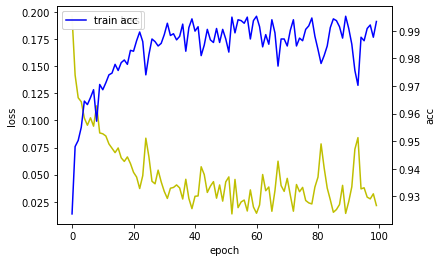

20/20 - 0s - loss: 1.8774 - accuracy: 0.6256
[[185 237]
 [  0 211]]

 [422 211]
sensitivity :  1.0
specificity :  0.43838862559241704
frr :  0.0
far :  0.5616113744075829


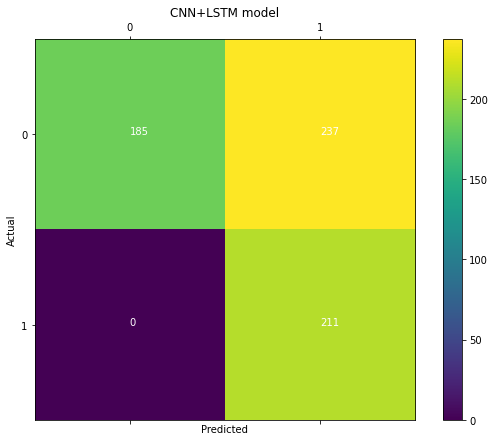

(3156, 480, 2)
(633, 480, 2)
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_38 (MaxPooling 

158/158 [==============================] - 2s 10ms/step - loss: 0.0302 - accuracy: 0.9895
Epoch 62/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 63/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 64/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0402 - accuracy: 0.9883
Epoch 65/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0414 - accuracy: 0.9899
Epoch 66/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0148 - accuracy: 0.9962
Epoch 67/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 68/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0140 - accuracy: 0.9968
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0112 - accuracy: 0.9949
Epoch 70/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0246 - a

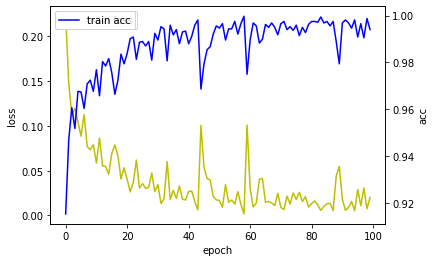

20/20 - 0s - loss: 1.1591 - accuracy: 0.7725
[[284 138]
 [  6 205]]

 [422 211]
sensitivity :  0.9715639810426541
specificity :  0.6729857819905213
frr :  0.02843601895734597
far :  0.32701421800947866


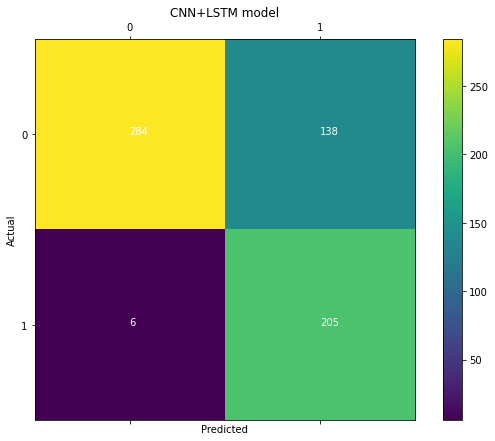

(3156, 480, 2)
(633, 480, 2)
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_41 (MaxPooling 

158/158 [==============================] - 2s 10ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 63/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0363 - accuracy: 0.9886
Epoch 64/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 65/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0927 - accuracy: 0.9747
Epoch 66/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0266 - accuracy: 0.9911
Epoch 67/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0480 - accuracy: 0.9829
Epoch 68/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0324 - accuracy: 0.9905
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0292 - accuracy: 0.9899
Epoch 70/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0121 - ac

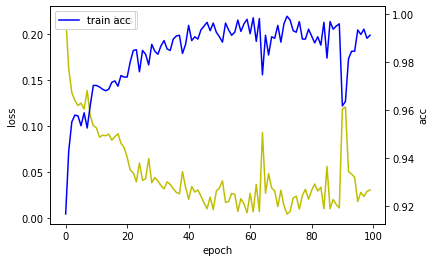

20/20 - 0s - loss: 0.6568 - accuracy: 0.7709
[[280 142]
 [  3 208]]

 [422 211]
sensitivity :  0.985781990521327
specificity :  0.6635071090047393
frr :  0.014218009478672985
far :  0.33649289099526064


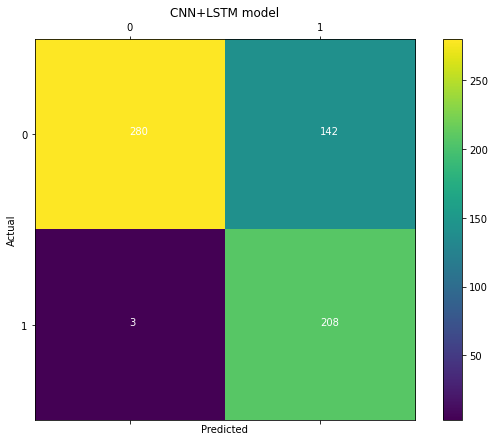

(3156, 480, 2)
(633, 480, 2)
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_44 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0160 - accuracy: 0.9940
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 0.9971
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0369 - accuracy: 0.9908
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0295 - accuracy: 0.9902
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0370 - accuracy: 0.9873
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0245 - accuracy: 

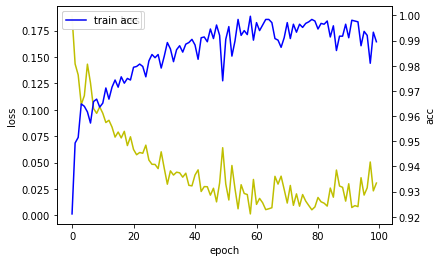

20/20 - 0s - loss: 0.5521 - accuracy: 0.8594
[[349  73]
 [ 16 195]]

 [422 211]
sensitivity :  0.9241706161137441
specificity :  0.8270142180094787
frr :  0.07582938388625593
far :  0.17298578199052134


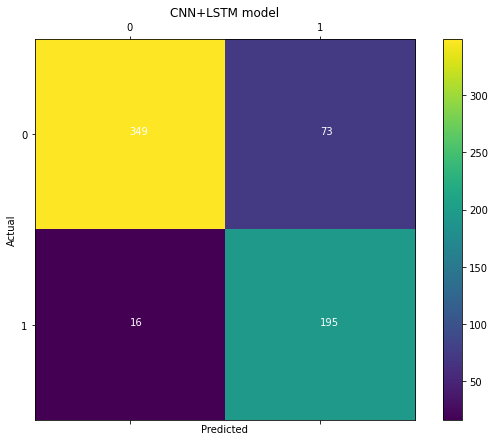

(3156, 480, 2)
(633, 480, 2)
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_47 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0345 - accuracy: 0.9902
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0447 - accuracy: 0.9854
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0194 - accuracy: 0.9933
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0352 - accuracy: 0.9889
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0395 - accuracy: 0.9861
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0218 - accuracy: 

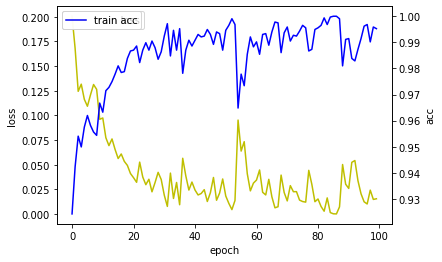

20/20 - 0s - loss: 1.5237 - accuracy: 0.7441
[[279 143]
 [ 19 192]]

 [422 211]
sensitivity :  0.909952606635071
specificity :  0.6611374407582938
frr :  0.09004739336492891
far :  0.33886255924170616


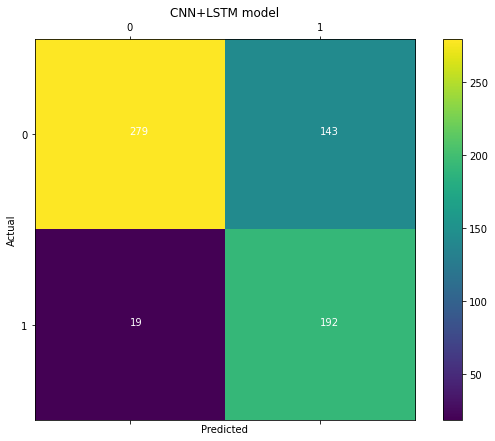

(3156, 480, 2)
(633, 480, 2)
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_50 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0219 - accuracy: 0.9962
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0284 - accuracy: 0.9895
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0206 - accuracy: 0.9924
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0207 - accuracy: 0.9930
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0103 - accuracy: 

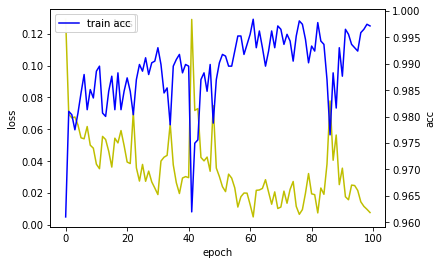

20/20 - 0s - loss: 0.4901 - accuracy: 0.9084
[[370  52]
 [  6 205]]

 [422 211]
sensitivity :  0.9715639810426541
specificity :  0.8767772511848341
frr :  0.02843601895734597
far :  0.12322274881516587


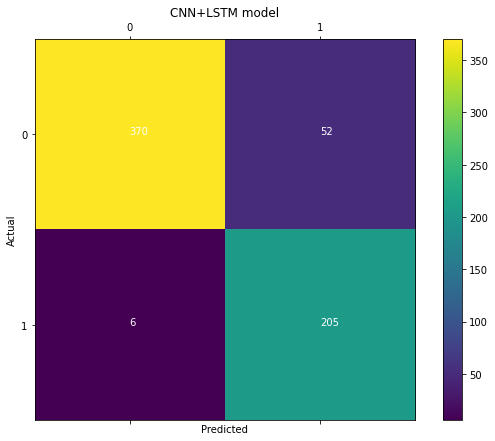

(3156, 480, 2)
(633, 480, 2)
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_53 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0257 - accuracy: 0.9902
Epoch 62/100
158/158 [==============================] - 2s 9ms/step - loss: 0.0248 - accuracy: 0.9908
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0315 - accuracy: 0.9889
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0291 - accuracy: 0.9876
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0262 - accuracy: 0.9902
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0693 - accuracy: 0.9788
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0455 - accuracy: 0.9867
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0504 - accuracy: 0.9819
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0415 - accuracy: 0.9832
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0559 - accuracy: 

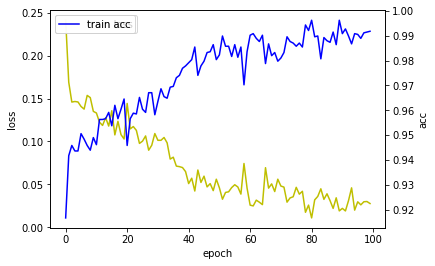

20/20 - 0s - loss: 2.3717 - accuracy: 0.5134
[[148 274]
 [ 34 177]]

 [422 211]
sensitivity :  0.8388625592417062
specificity :  0.35071090047393366
frr :  0.16113744075829384
far :  0.6492890995260664


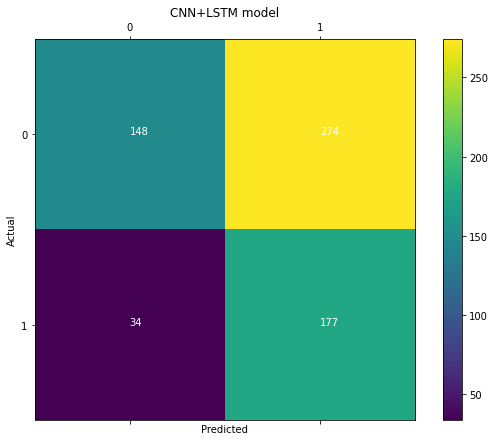

(3156, 480, 2)
(633, 480, 2)
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_56 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0194 - accuracy: 0.9927
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 8.6583e-04 - accuracy: 1.0000
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0080 - accuracy: 0.9978
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0600 - accuracy: 0.9807
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0250 - accuracy: 0.9899
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0248 - accura

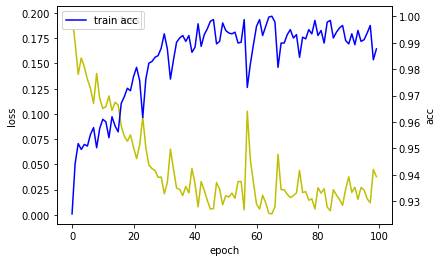

20/20 - 0s - loss: 1.4848 - accuracy: 0.6730
[[219 203]
 [  4 207]]

 [422 211]
sensitivity :  0.981042654028436
specificity :  0.518957345971564
frr :  0.018957345971563982
far :  0.48104265402843605


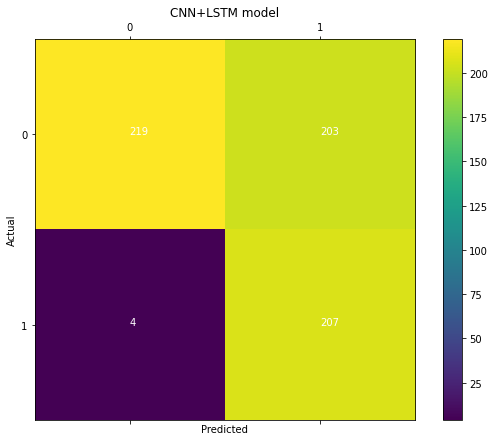

(3156, 480, 2)
(633, 480, 2)
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_59 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0504 - accuracy: 0.9826
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0496 - accuracy: 0.9826
Epoch 63/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0294 - accuracy: 0.9895
Epoch 64/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0178 - accuracy: 0.9949
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0120 - accuracy: 0.9956
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0429 - accuracy: 0.9851
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0188 - accuracy: 0.9930
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0150 - accuracy: 0.9933
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0239 - accuracy: 0.9905
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0259 - accuracy

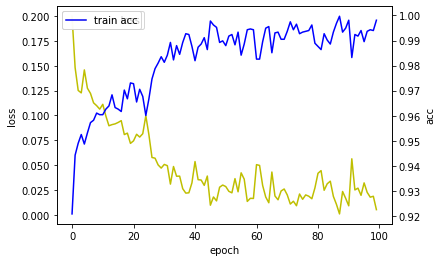

20/20 - 0s - loss: 2.5901 - accuracy: 0.7172
[[244 178]
 [  1 210]]

 [422 211]
sensitivity :  0.995260663507109
specificity :  0.5781990521327014
frr :  0.004739336492890996
far :  0.4218009478672986


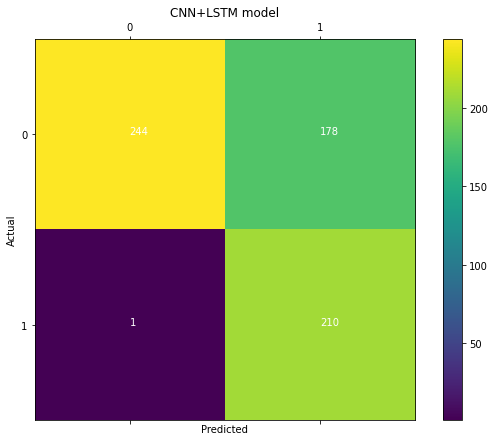

(3156, 480, 2)
(633, 480, 2)
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_62 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 5.1097e-05 - accuracy: 1.0000
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0329 - accuracy: 0.9927
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0164 - accuracy: 0.9943
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 65/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0260 - accuracy: 0.9914
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0148 - accuracy: 0.9949
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0097 - accur

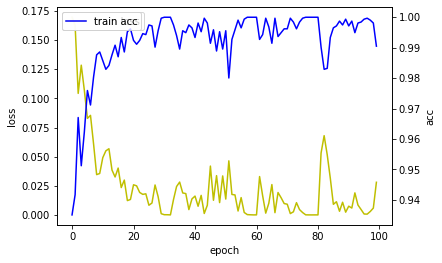

20/20 - 0s - loss: 0.3794 - accuracy: 0.8705
[[340  82]
 [  0 211]]

 [422 211]
sensitivity :  1.0
specificity :  0.8056872037914692
frr :  0.0
far :  0.1943127962085308


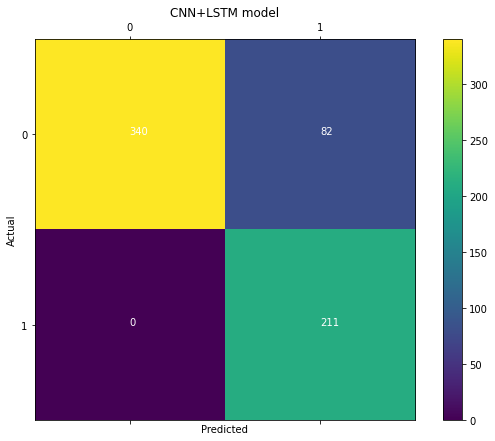

(3156, 480, 2)
(633, 480, 2)
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_65 (MaxPooling 

158/158 [==============================] - 1s 9ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 62/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0102 - accuracy: 0.9965
Epoch 63/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0448 - accuracy: 0.9851
Epoch 64/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 65/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0175 - accuracy: 0.9949
Epoch 66/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 67/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0157 - accuracy: 0.9940
Epoch 68/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0195 - accuracy: 0.9949
Epoch 69/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0146 - accuracy: 0.9956
Epoch 70/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0174 - accuracy: 

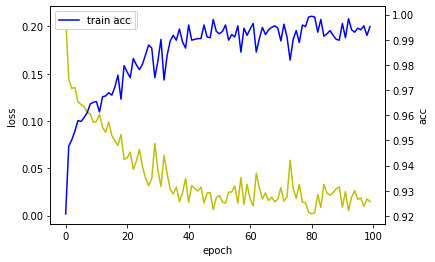

20/20 - 0s - loss: 2.1485 - accuracy: 0.7014
[[240 182]
 [  7 204]]

 [422 211]
sensitivity :  0.966824644549763
specificity :  0.5687203791469194
frr :  0.03317535545023697
far :  0.4312796208530806


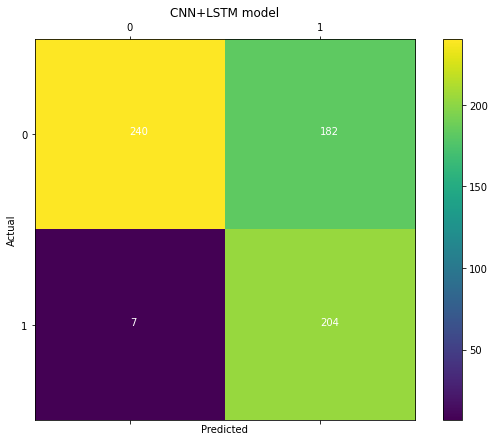

average_accuracy
0.7414907325397838
average_sensitivity
0.9586385178802241
average_specificity
0.6329168461869883
average_frr
0.04136148211977596
average_far
0.36708315381301165


In [5]:
# 각 sub 마다 모델 학습

# train data를 sub:other = 1:2로 만들기
# 3초 덩어리 개수 1052 : 2104
# 17 * 38 + 18 * 81 = 2104

# test data를 sub:other = 1:2로 만들기
# 3초 덩어리 개수 211 : 422
# 42 * 8 + 43 * 2 = 422

for i in range(train_sub_cnt):
    cnt = 0
    train_data_n = train_data_each[i]
    test_data_n = test_data_each[i]
    
    for j in range(sub_cnt):
        if j != i and cnt < 38:
            cnt = cnt + 1
            if j < 11:
                train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 17)), axis = 0)
            else:
                train_data_n = np.append(train_data_n, np.array(random.sample(list(public_data_each[j-11]), 17)), axis = 0)
        elif j != i and cnt >= 38:
            train_data_n = np.append(train_data_n, np.array(random.sample(list(public_data_each[j-11]), 18)), axis = 0)
    
    cnt = 0
    
    for j in range(test_sub_cnt):
        if j != i and cnt < 8:
            cnt = cnt + 1
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 42)), axis = 0)
        elif j != i and cnt >= 8:
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 43)), axis = 0)
            
    print(train_data_n.shape)
    print(test_data_n.shape)
    
    train_label = np.zeros(3156)
    test_label = np.zeros(633)
    
    for j in range(len(train_label)):
        if (j < train_sub_size):
            train_label[j] = 1
            
    for j in range(len(test_label)):
        if (j < test_sub_size):
            test_label[j] = 1
            
    ################################################################
    # 모델 구성하기                                                #
    # 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력뉴런 1개   #
    ################################################################

    # Cnn 층
    inputs = tf.keras.Input(shape = (480, 2))

    layers = tf.keras.layers.Conv1D(filters = 16, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(inputs)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    # LSTM 층
    layers = tf.keras.layers.LSTM(64)(layers)

    # Dense 층
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.Dense(128, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.01)(layers)
    layers = tf.keras.layers.Dense(64, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.05)(layers)
    layers = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

    model = tf.keras.models.Model(inputs = inputs, outputs = layers)
    model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.005), metrics=['accuracy'])
    model.summary()
    
    early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20)
    
#     # train 데이터를 train과 validation으로 분배
#     # validation 데이터를 여러 sub에서 가져갈 수 있도록 shuffle
#     x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.1, shuffle=True, random_state=1)

    print('##########')
    print('# sub', i+1, ' #')
    print('##########')

    # 모델 돌리기
#     hist = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_val, y_val), verbose=1, callbacks= [early_stopping])
    hist = model.fit(train_data_n, train_label, batch_size=20, epochs=100, verbose=1)
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    
    
    acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
    acc_ax.set_ylabel('acc')
    acc_ax.legend(loc='upper left')
    
    plt.show()
    
    # save model
    model.save('Sub_Model_' + str(i + 1) + '.h5')
    
    test_loss, test_acc = model.evaluate(test_data_n, test_label, verbose= 2)
    test_pred = model.predict(test_data_n)
    
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)
    
    # 확률이 0.5이상이면 자신(1), 작으면 타인(0)
    for i in range(len(test_pred)):
        if(0.5 <= test_pred[i]):
            test_pred[i] = 1

        else:
            test_pred[i] = 0
            
            
    test_pre_all.append(test_pred)
    
    # confusion matrix 생성
    conf_matrix = confusion_matrix(test_label, test_pred)
    
    #############################################################
    #       conf_matrix[0][0] = TN      conf_matrix[0][1] = FP  #
    #       conf_matrix[1][0] = FN      conf_matrix[1][1] = TP  #
    #############################################################

    print(conf_matrix)
    conf_mat_all.append(conf_matrix)

    # sum 이용 각 행 더하기
    row = conf_matrix.sum(axis=1)
    print('\n', row)

    # row[0] = spec의 분모, row[1] = sens의 분모

    test_sensitivity = conf_matrix[1][1] / row[1]
    test_specificity = conf_matrix[0][0] / row[0]
    
    test_frr = conf_matrix[1][0] / (conf_matrix[1][1]+conf_matrix[1][0])
    test_far = conf_matrix[0][1] / (conf_matrix[0][1]+conf_matrix[0][0])

    print('sensitivity : ', test_sensitivity)
    print('specificity : ', test_specificity) 
    print('frr : ', test_frr)
    print('far : ', test_far) 
    
    test_sen_all.append(test_sensitivity)
    test_spe_all.append(test_specificity)
    frr_all.append(test_frr)
    far_all.append(test_far)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    cax = ax.matshow(conf_matrix)

    fig.colorbar(cax)

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], color="white")

    plt.title('CNN+LSTM model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()
    
print('average_accuracy')
print(np.mean(test_acc_all))
print('average_sensitivity')
print(np.mean(test_sen_all))
print('average_specificity')
print(np.mean(test_spe_all))
print('average_frr')
print(np.mean(frr_all))
print('average_far')
print(np.mean(far_all))